### Student Name: Lee Yu Xian
### Student Number: 7233164
### Student Name: Chong Hui Wen
### Student Number: 7311436
### Student Name: Kaycee Tan Wan Ching
### Student Number: 7311540

#### Group 6, Assignment 2

### The objective of this task is to develop a big data project in Apache Spark using Spark’s MLlib library to predict the cover types. 

In [2]:
import findspark
findspark.init()
import pyspark
import pandas as pd
import numpy as np

In [9]:
# import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

In [73]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
# define the header for each columns
columns_name = [
                "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type"
            ]

In [53]:
#read file
df = spark.read.format("csv").option("header",False).option("delimiter",',').option("ignoreTrailingWhiteSpace", True).load("covtype.data")

In [54]:

df.show()
df

+----+---+---+---+---+----+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
| _c0|_c1|_c2|_c3|_c4| _c5|_c6|_c7|_c8| _c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|_c41|_c42|_c43|_c44|_c45|_c46|_c47|_c48|_c49|_c50|_c51|_c52|_c53|_c54|
+----+---+---+---+---+----+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|2596| 51|  3|258|  0| 510|221|232|148|6279|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0| 

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string, _c13: string, _c14: string, _c15: string, _c16: string, _c17: string, _c18: string, _c19: string, _c20: string, _c21: string, _c22: string, _c23: string, _c24: string, _c25: string, _c26: string, _c27: string, _c28: string, _c29: string, _c30: string, _c31: string, _c32: string, _c33: string, _c34: string, _c35: string, _c36: string, _c37: string, _c38: string, _c39: string, _c40: string, _c41: string, _c42: string, _c43: string, _c44: string, _c45: string, _c46: string, _c47: string, _c48: string, _c49: string, _c50: string, _c51: string, _c52: string, _c53: string, _c54: string]

In [57]:
newColNames =  [
                "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type"]

df = df.toDF(*newColNames)

In [58]:
df.show()

+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+-----------------+-----------------+-----------------+-----------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+----------+
|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|Wildernes

In [62]:
p_df = df.toPandas()

In [61]:
p_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [80]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int32
 1   Aspect                              581012 non-null  int32
 2   Slope                               581012 non-null  int32
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int32
 4   Vertical_Distance_To_Hydrology      581012 non-null  int32
 5   Horizontal_Distance_To_Roadways     581012 non-null  int32
 6   Hillshade_9am                       581012 non-null  int32
 7   Hillshade_Noon                      581012 non-null  int32
 8   Hillshade_3pm                       581012 non-null  int32
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int32
 10  Wilderness_Area_1                   581012 non-null  int32
 11  Wilderness_Area_2                   581012 non-null 

In [82]:
p_df = p_df.astype(int)
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int32
 1   Aspect                              581012 non-null  int32
 2   Slope                               581012 non-null  int32
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int32
 4   Vertical_Distance_To_Hydrology      581012 non-null  int32
 5   Horizontal_Distance_To_Roadways     581012 non-null  int32
 6   Hillshade_9am                       581012 non-null  int32
 7   Hillshade_Noon                      581012 non-null  int32
 8   Hillshade_3pm                       581012 non-null  int32
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int32
 10  Wilderness_Area_1                   581012 non-null  int32
 11  Wilderness_Area_2                   581012 non-null 

In [4]:
# Pre-processing using Pandas

# define the header for each columns
column_names = [
                "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type"
            ]

panda_df = pd.read_csv("covtype.data", names=column_names)

panda_df.head(n = 5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
panda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

In [10]:
panda_df.to_csv("covtype_pandas.csv", index=False)
spark_df = spark.read.options(header=True, inferSchema=True, delimiter=",").csv("covtype_pandas.csv")

In [11]:
spark_df.printSchema()

root
 |-- Elevation: integer (nullable = true)
 |-- Aspect: integer (nullable = true)
 |-- Slope: integer (nullable = true)
 |-- Horizontal_Distance_To_Hydrology: integer (nullable = true)
 |-- Vertical_Distance_To_Hydrology: integer (nullable = true)
 |-- Horizontal_Distance_To_Roadways: integer (nullable = true)
 |-- Hillshade_9am: integer (nullable = true)
 |-- Hillshade_Noon: integer (nullable = true)
 |-- Hillshade_3pm: integer (nullable = true)
 |-- Horizontal_Distance_To_Fire_Points: integer (nullable = true)
 |-- Wilderness_Area_1: integer (nullable = true)
 |-- Wilderness_Area_2: integer (nullable = true)
 |-- Wilderness_Area_3: integer (nullable = true)
 |-- Wilderness_Area_4: integer (nullable = true)
 |-- Soil_Type_1: integer (nullable = true)
 |-- Soil_Type_2: integer (nullable = true)
 |-- Soil_Type_3: integer (nullable = true)
 |-- Soil_Type_4: integer (nullable = true)
 |-- Soil_Type_5: integer (nullable = true)
 |-- Soil_Type_6: integer (nullable = true)
 |-- Soil_Type

In [19]:
train, test = spark_df.randomSplit([0.7, 0.3], seed = 42069)
print(f"train count = {train.count()}, test count = {test.count()}") 


train count = 406913, test count = 174099


In [83]:
print('Skewness of all the features: ')
skewness = p_df.skew()
print(skewness)

Skewness of all the features: 
Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area_1                       0.205618
Wilderness_Area_2                       4.061595
Wilderness_Area_3                       0.257822
Wilderness_Area_4                       3.575561
Soil_Type_1                            13.736670
Soil_Type_2                             8.615358
Soil_Type_3                            10.838630
Soil_Type_4                             6.625176
Soil_Type_5                            18.995243
Soil_Type_6                           

In [86]:
#  returns the correlation matrix of the dataframe
corr_matrix = p_df.corr()
corr_matrix = corr_matrix['Cover_Type'].sort_values(ascending=False)
corr_matrix

Cover_Type                            1.000000
Wilderness_Area_4                     0.323200
Soil_Type_10                          0.243876
Soil_Type_38                          0.160170
Soil_Type_39                          0.155668
Slope                                 0.148285
Soil_Type_40                          0.128351
Soil_Type_2                           0.118135
Soil_Type_6                           0.112958
Soil_Type_4                           0.099672
Soil_Type_1                           0.090828
Soil_Type_17                          0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type_35                          0.080315
Soil_Type_37                          0.080271
Soil_Type_5                           0.077890
Soil_Type_3                           0.068064
Wilderness_Area_3                     0.066846
Soil_Type_14                          0.065562
Soil_Type_11                          0.035379
Soil_Type_36                          0.025397
Soil_Type_13 

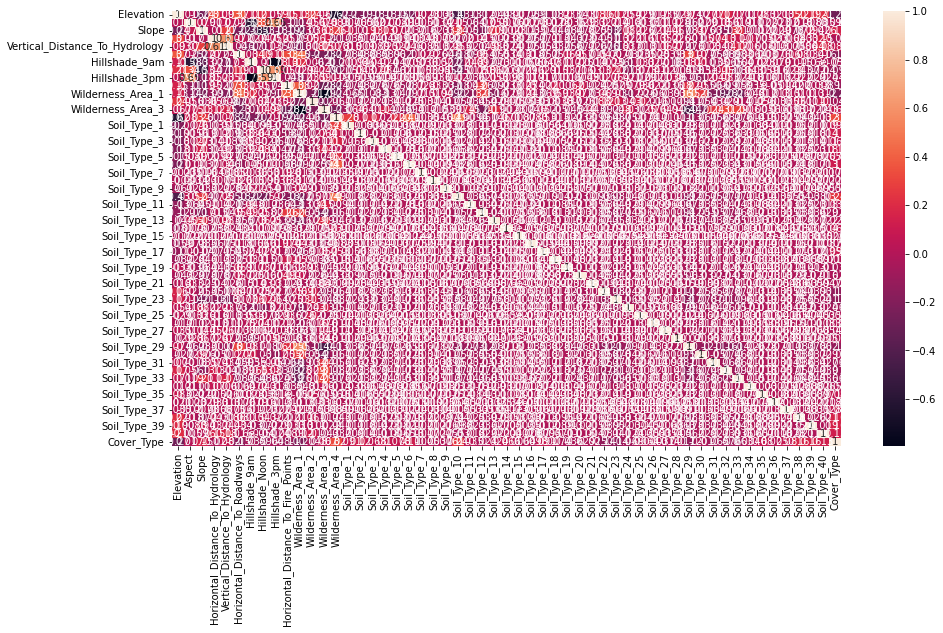

In [87]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(15,8))

# using heapmap to plot
sns.heatmap(p_df.corr(), annot=True)

# show the plot
plt.show()

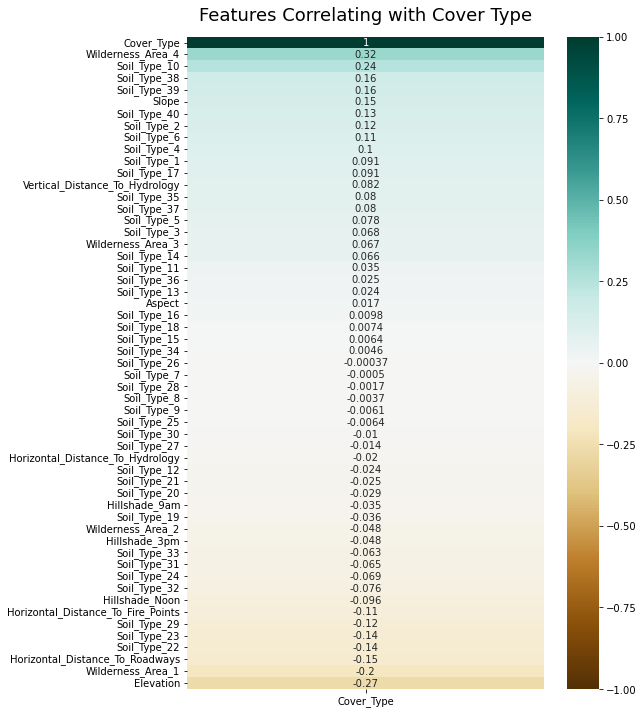

In [88]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(p_df.corr()[['Cover_Type']].sort_values(by='Cover_Type', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Cover Type', fontdict={'fontsize':18}, pad=16);

In [90]:
# show the tota number of each cover types in this dataframe
p_df.groupby('Cover_Type').size()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
dtype: int64

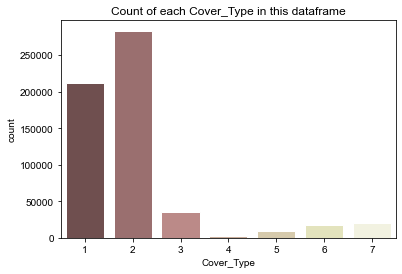

In [91]:
# visualize the count of each 'Load_Type' in this dataframe
plt.title('Count of each Cover_Type in this dataframe')
sns.set_style('whitegrid')
sns.countplot(x=p_df['Cover_Type'], palette = 'pink')

plt.show()

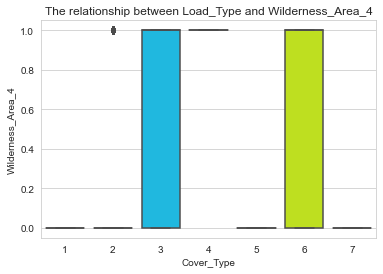

In [110]:
# Visualize the relationship between Load_Type and Wilderness_Area_4
plt.title('The relationship between Load_Type and Wilderness_Area_4')

graph = sns.boxplot(data=p_df, x='Cover_Type', y='Wilderness_Area_4', palette='gist_rainbow_r')

plt.show()

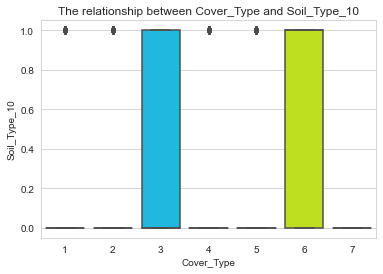

In [111]:
# Visualize the relationship between Cover_Type and Soil_Type_10
plt.title('The relationship between Cover_Type and Soil_Type_10')

graph = sns.boxplot(data=p_df, x='Cover_Type', y='Soil_Type_10', palette='gist_rainbow_r')
plt.show()

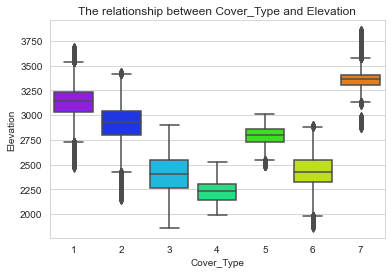

In [112]:
# Visualize the relationship between Cover_Type and Elevation
plt.title('The relationship between Cover_Type and Elevation')

graph = sns.boxplot(data=p_df, x='Cover_Type', y='Elevation', palette='gist_rainbow_r')

plt.show()

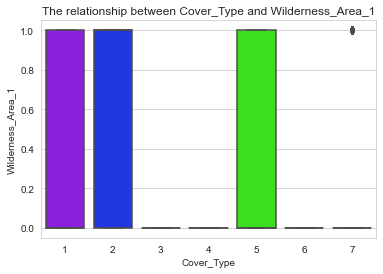

In [113]:
# Visualize the relationship between Cover_Type and Wilderness_Area_1
plt.title('The relationship between Cover_Type and Wilderness_Area_1')

graph = sns.boxplot(data=p_df, x='Cover_Type', y='Wilderness_Area_1', palette='gist_rainbow_r')

plt.show()

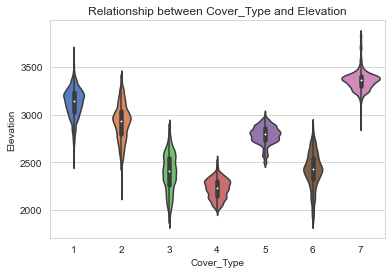

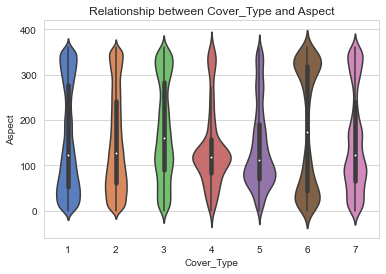

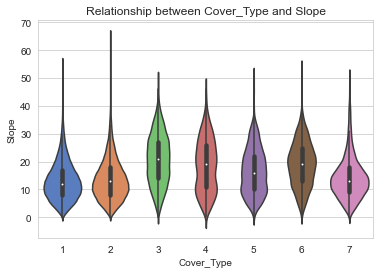

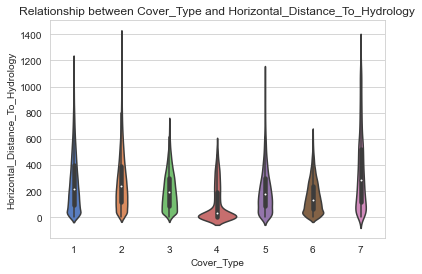

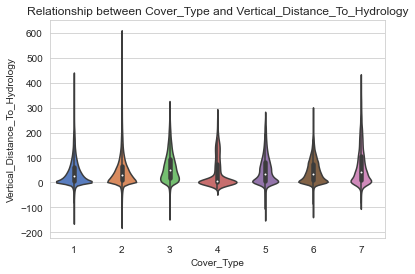

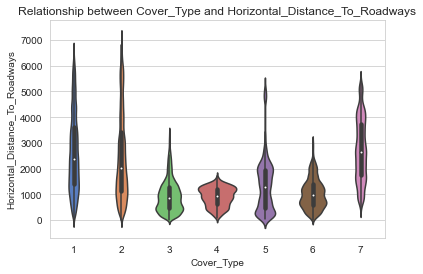

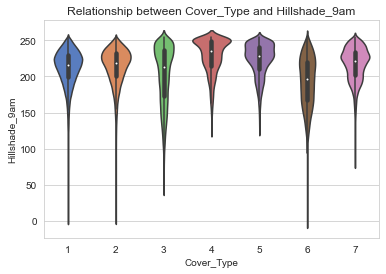

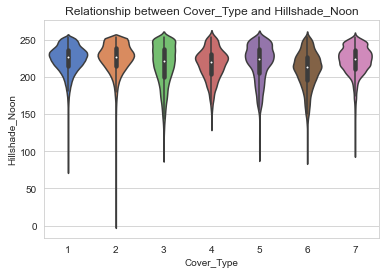

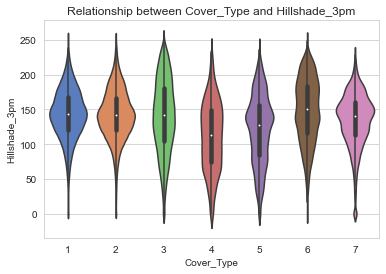

In [114]:
# get all the columns name
all_columns = p_df.columns

# eliminate the target column
eliminate_target = len(all_columns)-1

# x-axis is for target column
x = all_columns[eliminate_target]

# y-axis is for the features
y = all_columns[0:eliminate_target]

# plot out the graph
for a in range(0, 9):
    sns.violinplot(data=p_df, x=x, y=y[a], palette="muted")
    
    # set the title for each of the graphes
    plt.title('Relationship between Cover_Type and ' + all_columns[a])
    plt.show()

### (2) Naive Bayes Classifier

In [115]:
# instantiate the GaussianNB() model
nbc = GaussianNB(var_smoothing=3e-9)

# fit the model with X_train and y_train
nbc.fit(X_train, y_train)

# make prediction with X_test
y_pred = nbc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))

NameError: name 'GaussianNB' is not defined